In [261]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/foodfatscarbs/Copy of nutrition.csv
/kaggle/input/fatscarbsfooddatabase/Fat-Cabs-Foods-raw.csv


In [264]:
dff = pd.read_csv("../input/foodfatscarbs/Copy of nutrition.csv")
dff.drop("Unnamed: 0",axis=1,inplace=True)
#dff["water"]=[float(a.split("g")[0]) for a in dff["water"]]
#dff["Carbohydrate"]=[float(a.split("g")[0]) for a in dff["Carbohydrate"]]
dff.head()

,name,calories,water,carborhyrate_total,free_saccharides_total,fructose_free,glucose_free,sucrose_free,maltose_free,lactose_free,...,FA_20:4_n-6,FA_20:5_n-3,FA_22:0,FA_22:1_n-9,FA_22:4_n-6,FA_22:5_n-3,FA_22:6_n-3,FA 24:0,FA_24:1_n-9,Unnamed: 78
0,Milk 2% Fat,29.23,89.22,3.5564,3.2777,0.0,0.0,0.0,0.0,3.2777,...,0.0103,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,NaN
1,Milk 2% Fat,30.29,89.22,3.8521,3.5587,0.0,0.0,0.0,0.0,3.5587,...,0.0108,0.0,0.0,0.0,0.0,0.0000,0.0017,0.0,0.0,NaN
2,Milk 2% Fat,29.13,89.22,3.6869,3.4518,0.0,0.0,0.0,0.0,3.4518,...,0.0109,0.0,0.0,0.0,0.0,0.0000,0.0017,0.0,0.0,NaN
3,Mixed Cheese,212.19,41.60,6.8188,4.9411,0.0,0.0,0.0,0.0,4.9411,...,0.1401,0.0,0.0,0.0,0.0,0.0121,0.0187,0.0,0.0,NaN
4,Mixed Cheese,201.87,41.60,6.5300,4.3838,0.0,0.0,0.0,0.0,4.3838,...,0.1319,0.0,0.0,0.0,0.0,0.0117,0.0145,0.0,0.0,NaN


# Groupwise Mean

In [265]:
dff2 = dff.groupby("name").agg(["mean"])
dff2.columns = [a[0] for a in dff2.columns]
dff2.insert(0,"name",dff2.index)
dff2.index=[a for a in range(0,len(dff2))]
#dff2.to_csv('mean.csv')#if you want to save it as excel or csv
dff2

,name,calories,water,carborhyrate_total,free_saccharides_total,fructose_free,glucose_free,sucrose_free,maltose_free,lactose_free,...,FA_20:4_n-6,FA_20:5_n-3,FA_22:0,FA_22:1_n-9,FA_22:4_n-6,FA_22:5_n-3,FA_22:6_n-3,FA 24:0,FA_24:1_n-9,Unnamed: 78
0,Apple,37.396667,85.21,9.280333,8.603967,5.443500,1.992867,1.167567,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,NaN
1,Bacon Strip,153.893333,38.68,11.191733,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073467,0.0,0.000000,0.000000,0.000000,0.022300,0.00,NaN
2,Beef Flank Steak,35.583333,68.10,0.172300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.087917,0.000267,0.000000,0.0,0.002850,0.002033,0.001233,0.003700,0.00,NaN
3,Beef Ribeye,52.476667,62.89,0.350600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057267,0.000000,0.000000,0.0,0.002467,0.001600,0.002700,0.011300,0.00,NaN
4,Beef Tips,50.223333,63.79,4.645700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.026833,0.0,0.000000,0.000100,0.000000,0.010100,0.00,NaN
5,Beyond Chicken Tenders,169.246667,43.23,27.030167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.042067,0.0,0.000000,0.000267,0.000000,0.015733,0.00,NaN
6,Beyond Ground Beef,62.870000,60.48,5.491733,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.016600,0.0,0.000000,0.000000,0.000000,0.009667,0.00,NaN
7,Beyond Sausage,83.613333,56.18,2.795333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.052967,0.0,0.000000,0.000000,0.000000,0.022600,0.00,NaN
8,Breaded Chicken Breast Tenders,108.110000,49.74,11.254667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.112967,0.000000,0.046900,0.0,0.006200,0.002400,0.000000,0.014700,0.00,NaN
9,Buttermilk,24.296667,90.32,4.653633,4.532167,0.000000,0.000000,0.000000,0.000000,4.532167,...,0.003367,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,NaN


# **Data Visualization**

In [266]:
di = pd.read_csv("/kaggle/input/fatscarbsfooddatabase/Fat-Cabs-Foods-raw.csv")
di=di.iloc[:,1:]
for a in di.columns[2:]:
    di[a] = [float(a.split("g")[0]) for a in di[a]]
#dff2.columns = di.columns
df=dff2.copy()

In [267]:
df.info()
df.describe()
df.columns
df.corr()
df.index=df.name

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         37 non-null     object 
 1   calories                     37 non-null     float64
 2   water                        37 non-null     float64
 3   carborhyrate_total           37 non-null     float64
 4   free_saccharides_total       37 non-null     float64
 5   fructose_free                37 non-null     float64
 6   glucose_free                 37 non-null     float64
 7   sucrose_free                 36 non-null     float64
 8   maltose_free                 37 non-null     float64
 9   lactose_free                 37 non-null     float64
 10  melibiose_free               37 non-null     float64
 11  kestose_free                 37 non-null     float64
 12  raffinose_free               37 non-null     float64
 13  isomaltotriose_free   

In [268]:
df["Total_Carbs_percent"]=((df["carborhyrate_total"]*4)/df["calories"])*100
df["Saccharides_percent"]=((df["free_saccharides_total"]*4)/df["calories"])*100
df["Fibres_percent"]     =((df["fibers_total"]*4)/df["calories"])*100
df["Fats_percent"]       =((df["fat_total"]*9)/df["calories"])*100
df["Saturated_fatty_acids_percent"]      =((df["saturated_fatty_acids"]*9)/df["calories"])*100
df["Monounsaturated_fatty_acids_percent"]=((df["monounsaturated_fatty_acids"]*9)/df["calories"])*100
df["Fatty_acids_trans_percent"]          =((df["fatty_acids_total_trans"]*9)/df["calories"])*100

In [269]:
df.iloc[:,[1,-7,-6,-5,-4,-3,-2,-1]]

,calories,Total_Carbs_percent,Saccharides_percent,Fibres_percent,Fats_percent,Saturated_fatty_acids_percent,Monounsaturated_fatty_acids_percent,Fatty_acids_trans_percent
name,,,,,,,,
Apple,37.396667,99.263749,92.029236,7.234869,0.737231,0.290400,0.381050,0.000000
Bacon Strip,153.893333,29.089586,0.000000,29.089586,70.912039,17.653981,14.895577,3.234058
Beef Flank Steak,35.583333,1.936862,0.000000,1.936862,98.064590,50.641124,29.631288,8.646323
Beef Ribeye,52.476667,2.672426,0.000000,2.672426,97.329543,58.134981,26.973703,6.824176
Beef Tips,50.223333,37.000332,0.000000,37.000332,62.997611,18.475476,24.616646,3.151523
Beyond Chicken Tenders,169.246667,63.883484,0.000000,63.883484,36.115571,10.246996,14.649506,2.033304
Beyond Ground Beef,62.870000,34.940247,0.000000,34.940247,65.060442,30.588834,20.223636,2.451249
Beyond Sausage,83.613333,13.372668,0.000000,13.372668,86.625179,52.112382,20.541700,2.664766
Breaded Chicken Breast Tenders,108.110000,41.641538,0.000000,41.641538,58.358894,17.892332,10.475442,2.508001


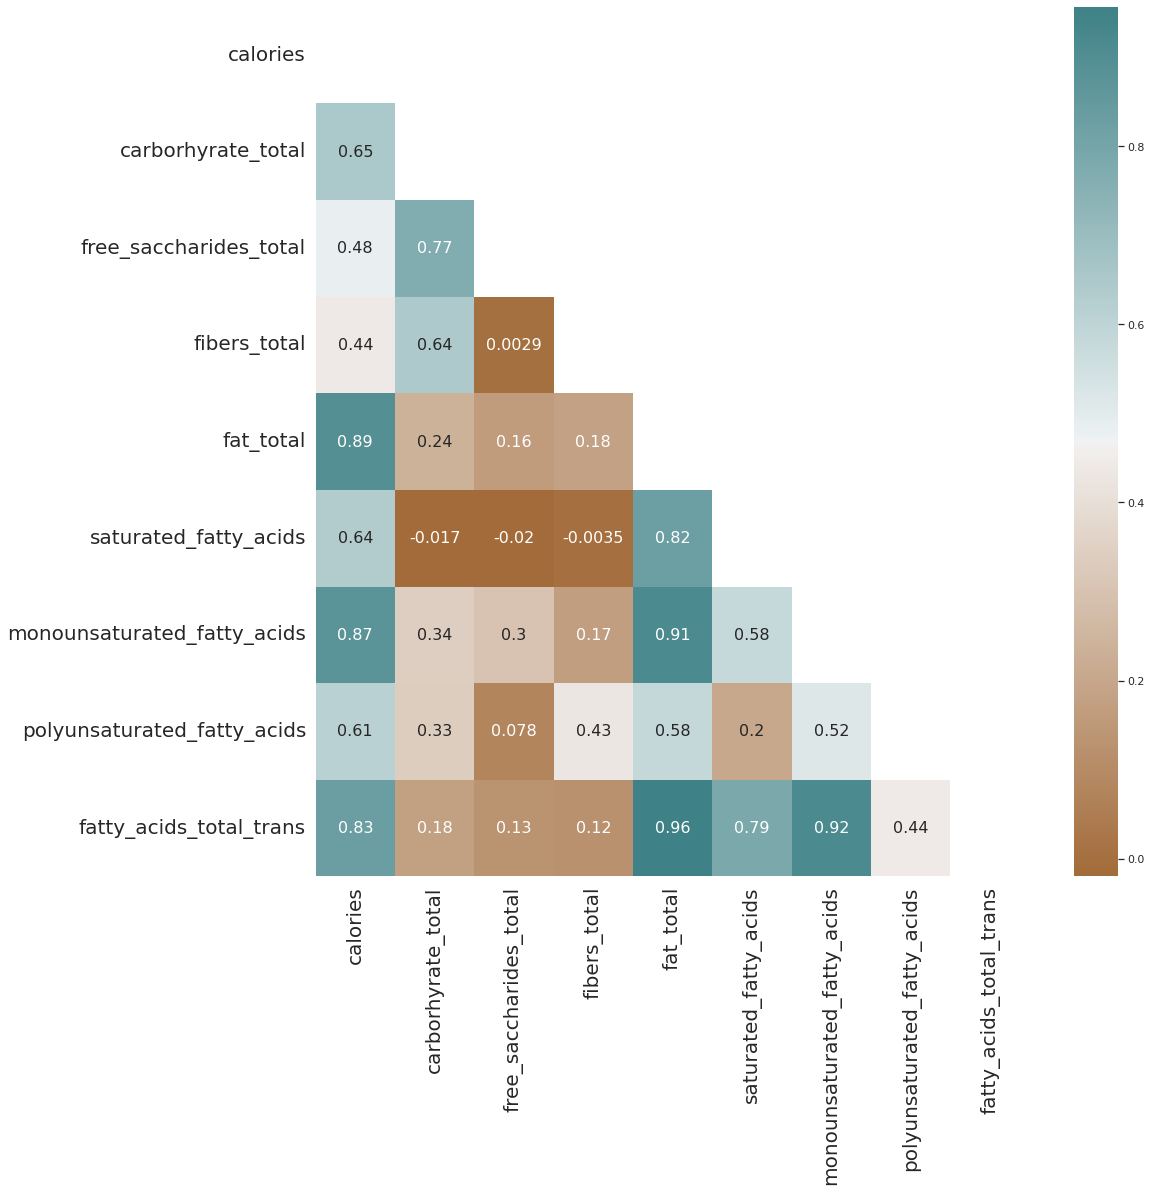

In [270]:
corr = df.iloc[:,[1,3,4,22,37,38,39,40,41]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(40,200, as_cmap=True)
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True,mask=mask,cmap=cmap,annot_kws={"size":16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20,rotation=0)
plt.show()

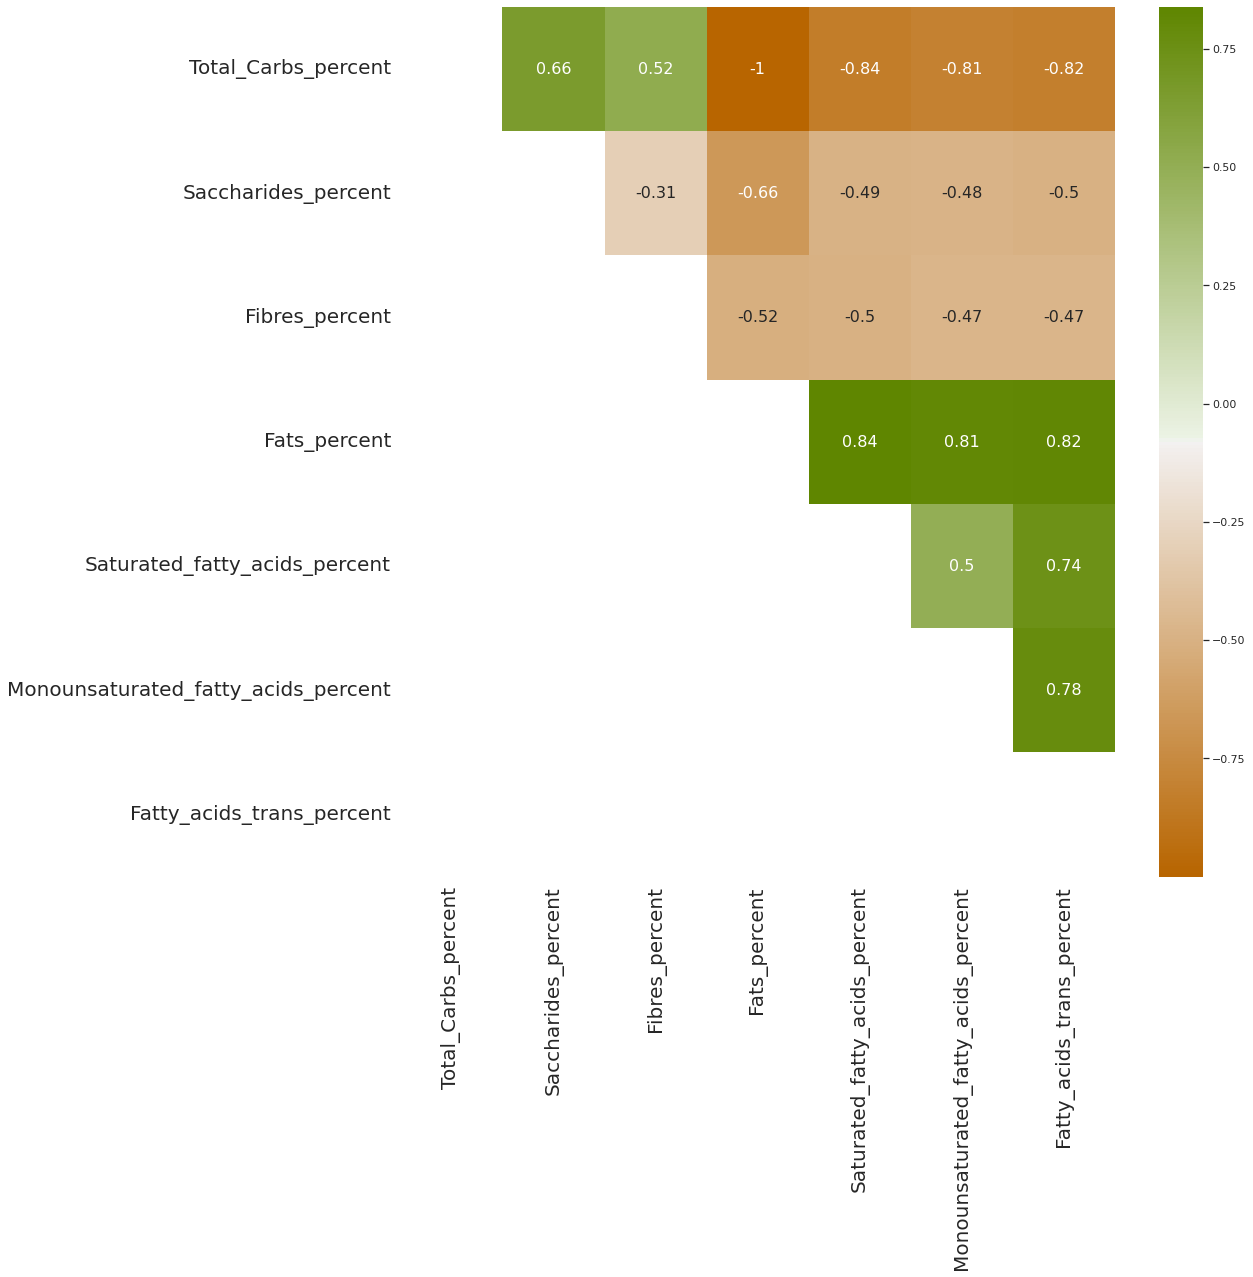

In [271]:
corr = df.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(50,100,200, as_cmap=True)
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True,mask=mask,cmap=cmap,annot_kws={"size":16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20,rotation=0)
plt.show()

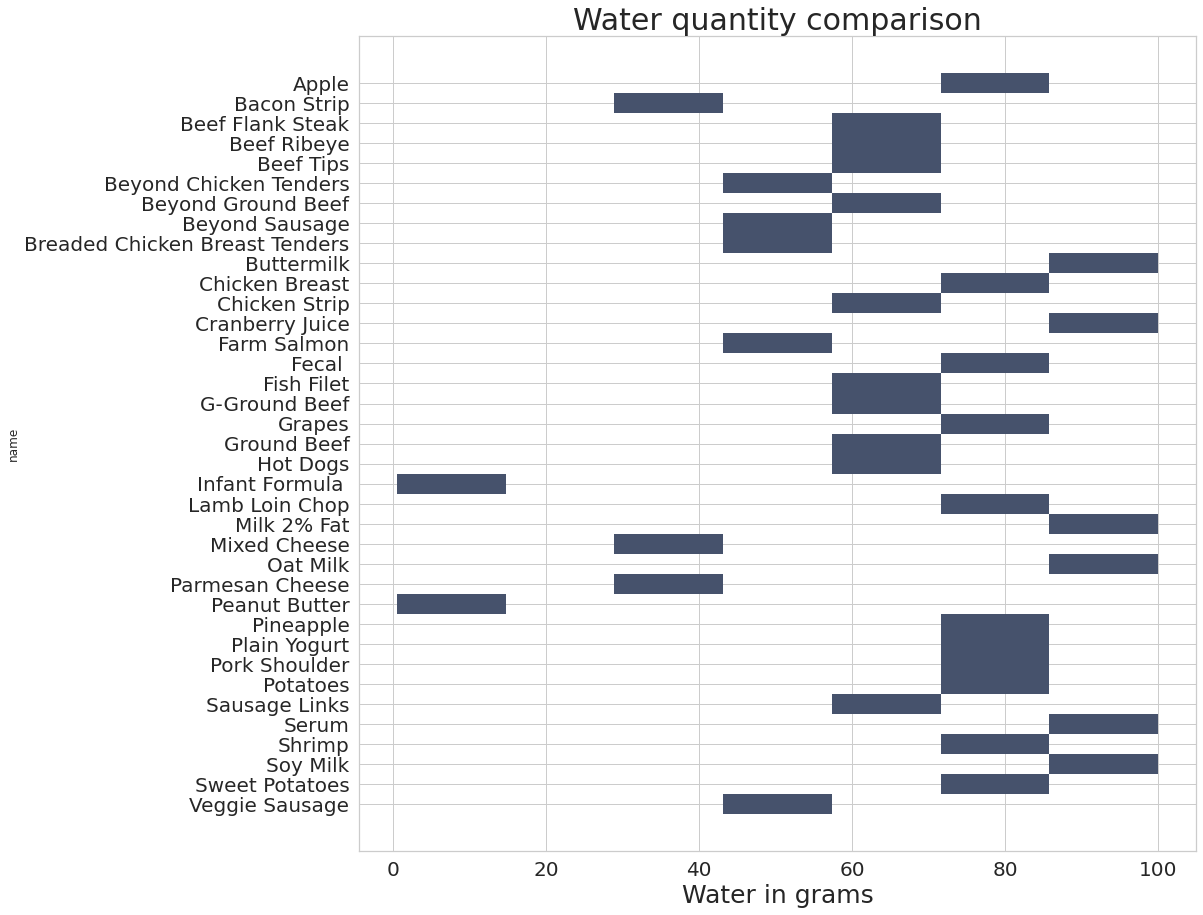

In [272]:
plt.figure(figsize=(15,15))
sns.histplot(data=df,x="water",y="name")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Water in grams",fontsize=25)
plt.title("Water quantity comparison",fontsize=30)
plt.show()

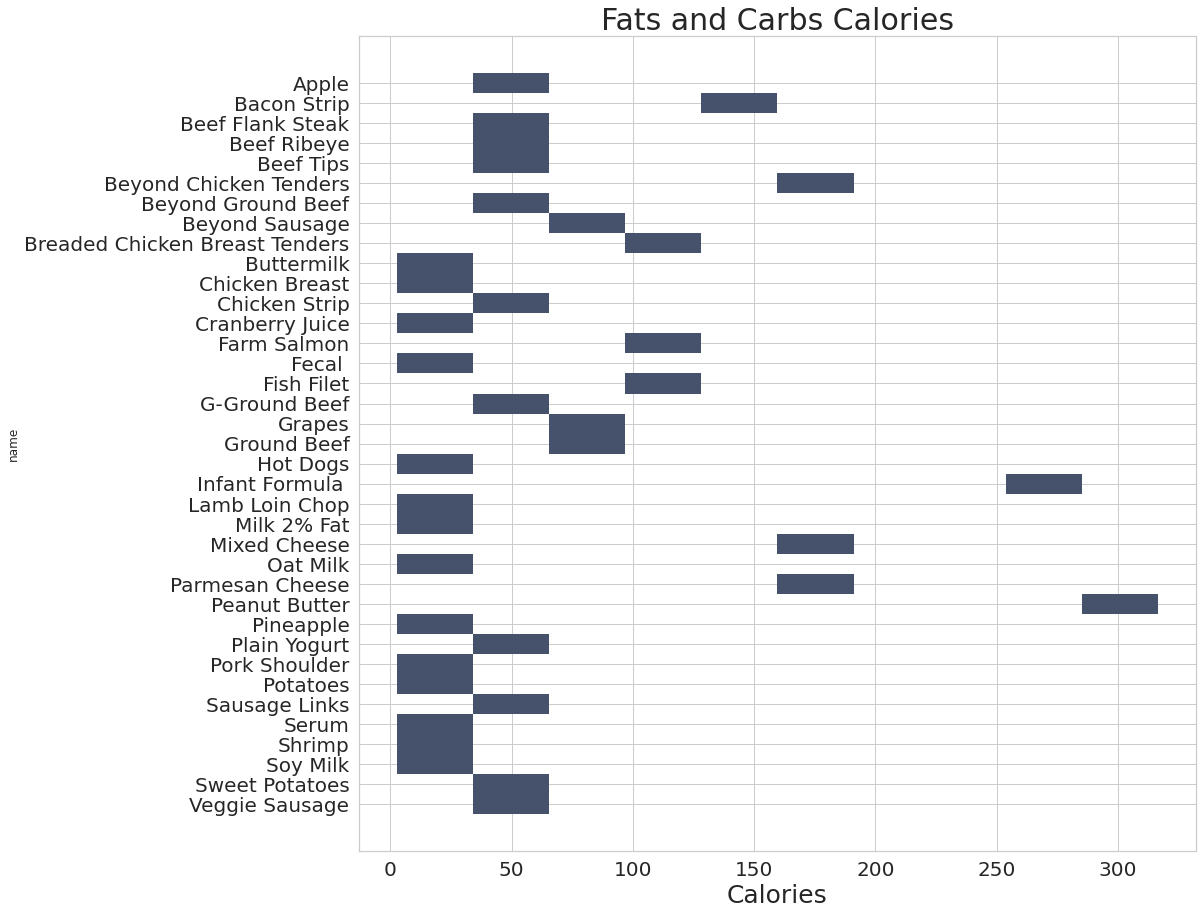

In [273]:
plt.figure(figsize=(15,15))
sns.histplot(data=df,x="calories",y="name")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Calories",fontsize=25)
plt.title("Fats and Carbs Calories",fontsize=30)
plt.show()

#These columns have constant 0 values as seen by the graph, so dropping them out
ctd = df.columns[[10,13,18,20,32,33,35,58,71]]
df.drop(ctd,axis=1,inplace=True)

# **Carbohydrate Analysis**

In [274]:
df.columns

Index(['name', 'calories', 'water', 'carborhyrate_total',
       'free_saccharides_total', 'fructose_free', 'glucose_free',
       'sucrose_free', 'maltose_free', 'lactose_free', 'kestose_free',
       'raffinose_free', 'kestotetraose_free', 'ketopentaose_free',
       'maltopentaose_free', 'maltotetraose_free', 'stachyose_free',
       'maltohexaose_free', 'fibers_total', 'glucose_pm', 'galactose_pm',
       'fructose_pm', 'xylose_pm', 'arabinose_pm', 'fucose_pm', 'rhamnose_pm',
       'GlcA_pm', 'GalA_pm', 'mannose_pm', 'ribose_pm', 'fat_total',
       'saturated_fatty_acids', 'monounsaturated_fatty_acids',
       'polyunsaturated_fatty_acids', 'fatty_acids_total_trans', 'FA_6:0',
       'FA_8:0', 'FA_10:0', 'FA_12:0', 'FA_14:0', 'FA_14:1', 'FA_15:0',
       'FA_16:0', 'FA_16:1', 'FA_17:0', 'FA_18:0', 'FA_18:1',
       'FA_18:1_11-trans', 'FA_18:1_9-trans', 'FA_18:2 n-6', 'FA_18:2_trans-6',
       'FA_18:3_n-3', 'FA_18:3_n-6', 'FA_18:4_n-3', 'FA _20:0', 'FA_20:1_n-12',
       'FA_20:

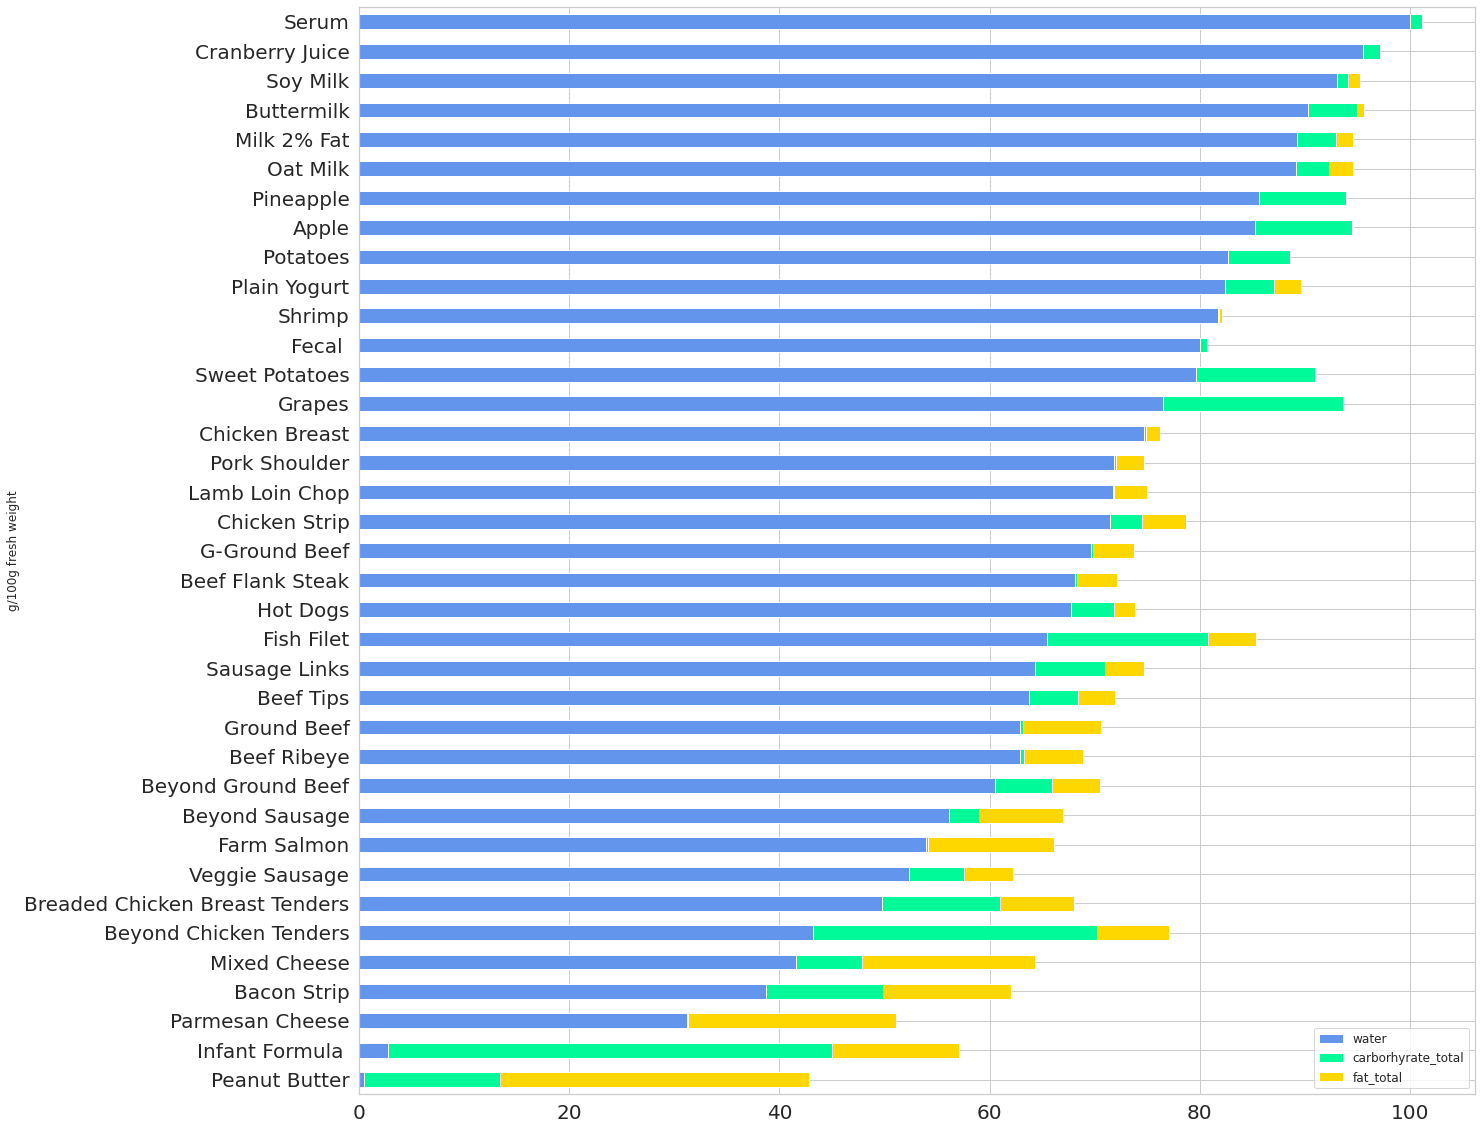

In [275]:
df[["water","carborhyrate_total","fat_total"]].sort_values(by="water").plot(kind="barh",figsize=(20,20),color=["cornflowerblue", "mediumspringgreen", "gold"],stacked=True)
plt.legend(prop={"size":12})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("g/100g fresh weight")
plt.show()

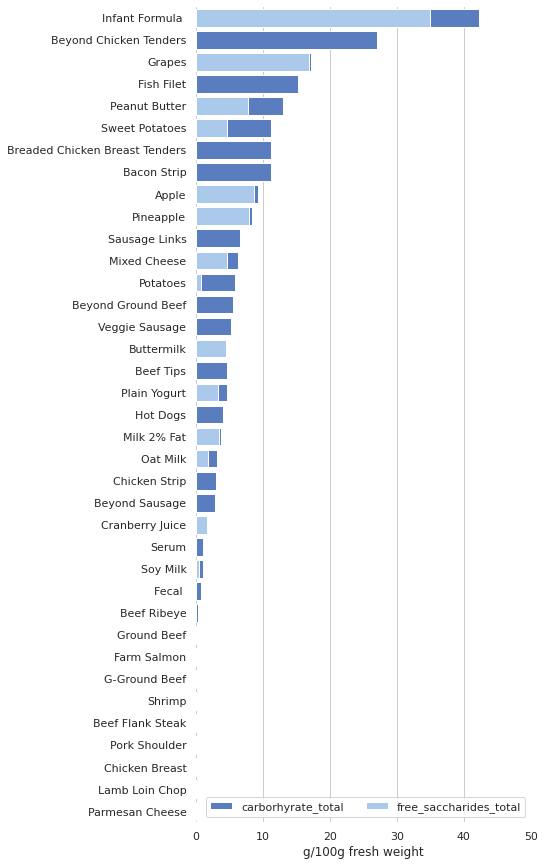

In [276]:
#Good example- I made this comparing to yours above
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the data
df.index=df.name
carbs = df[["carborhyrate_total","free_saccharides_total", "name"]].sort_values("carborhyrate_total", ascending=False)

# Plot the total carborhydrate
sns.set_color_codes("muted")
sns.barplot(x="carborhyrate_total", y = "name", data =carbs,
            label="carborhyrate_total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="free_saccharides_total", y="name", data=carbs,
            label="free_saccharides_total", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 50), ylabel="",
       xlabel="g/100g fresh weight")
sns.despine(left=True, bottom=True)

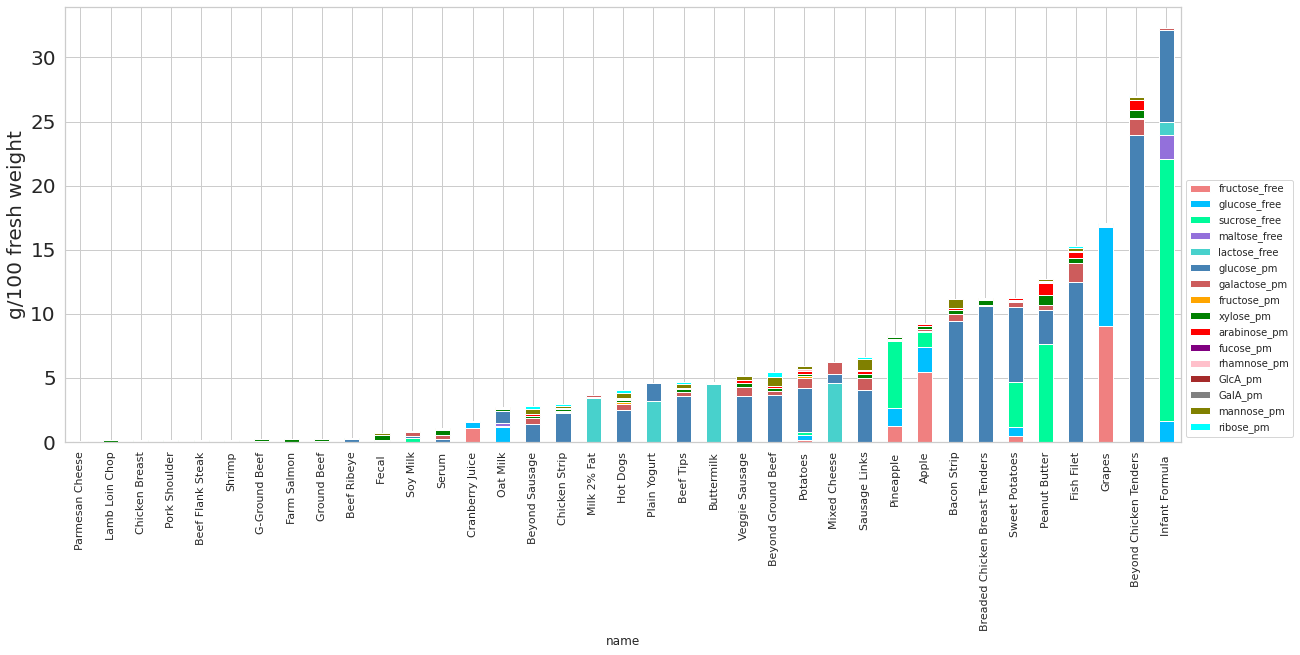

In [277]:
df1 = df[["fructose_free", 'glucose_free',
       'sucrose_free', 'maltose_free', 'lactose_free', 'glucose_pm', 'galactose_pm',
       'fructose_pm', 'xylose_pm', 'arabinose_pm', 'fucose_pm', 'rhamnose_pm',
       'GlcA_pm', 'GalA_pm', 'mannose_pm', 'ribose_pm']]
sum = df1.sum(axis=1)
dff = pd.DataFrame()
for a in df1.columns:
    dff[a]=(df1[a])
    
ax = dff.loc[df1.sum(axis=1).sort_values().index].plot(kind="bar",figsize=(20,8),stacked=True, color=["lightcoral","deepskyblue","mediumspringgreen","mediumpurple","mediumturquoise","steelblue","indianred","orange","green","red",
                                                   "purple","pink","brown","gray","olive","cyan","navy","lime","tan"])


plt.legend(loc=3,prop={"size":10},ncol=1, bbox_to_anchor=(1.0, 0),fancybox=True)
plt.yticks(fontsize=20)
plt.ylabel("g/100 fresh weight",fontsize=20)
plt.show()




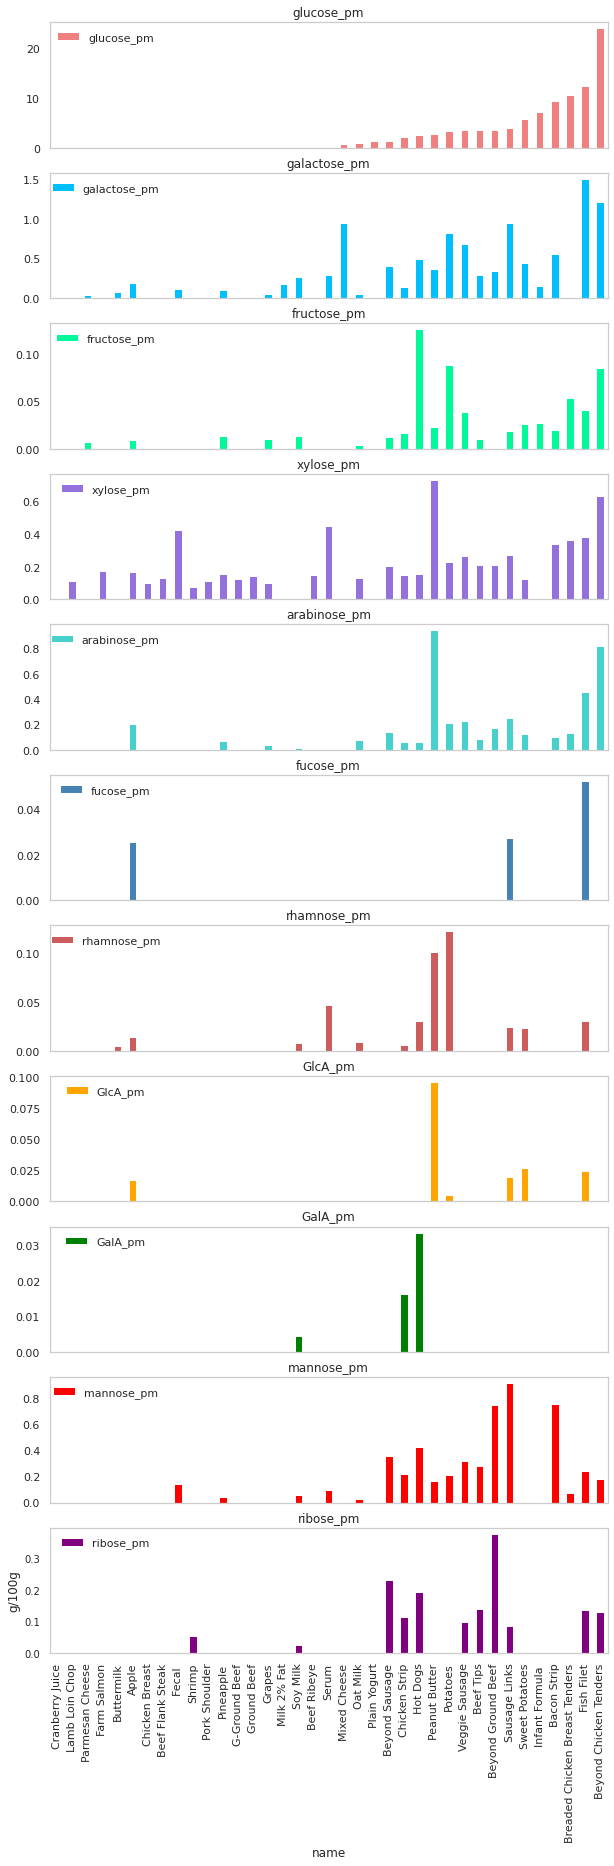

In [278]:
df2 = df[['glucose_pm', 'galactose_pm',
       'fructose_pm', 'xylose_pm', 'arabinose_pm', 'fucose_pm', 'rhamnose_pm',
       'GlcA_pm', 'GalA_pm', 'mannose_pm', 'ribose_pm']]
ax = df2.sort_values(by="glucose_pm").plot(kind="bar",stacked=True,figsize=(10,30),
                                                    color=["lightcoral","deepskyblue","mediumspringgreen","mediumpurple","mediumturquoise","steelblue","indianred","orange","green","red",
                                                   "purple","pink","brown","gray","olive","cyan","navy","lime","tan"]
                                                  ,subplots=True, grid =False)

axes = ax.flat
fig = axes[0].get_figure()
for a in axes:
    a.legend(loc='upper center', bbox_to_anchor=(0.1,1), frameon=False)
    plt.ylabel("g/100g")

plt.yticks(fontsize=10)
plt.show()

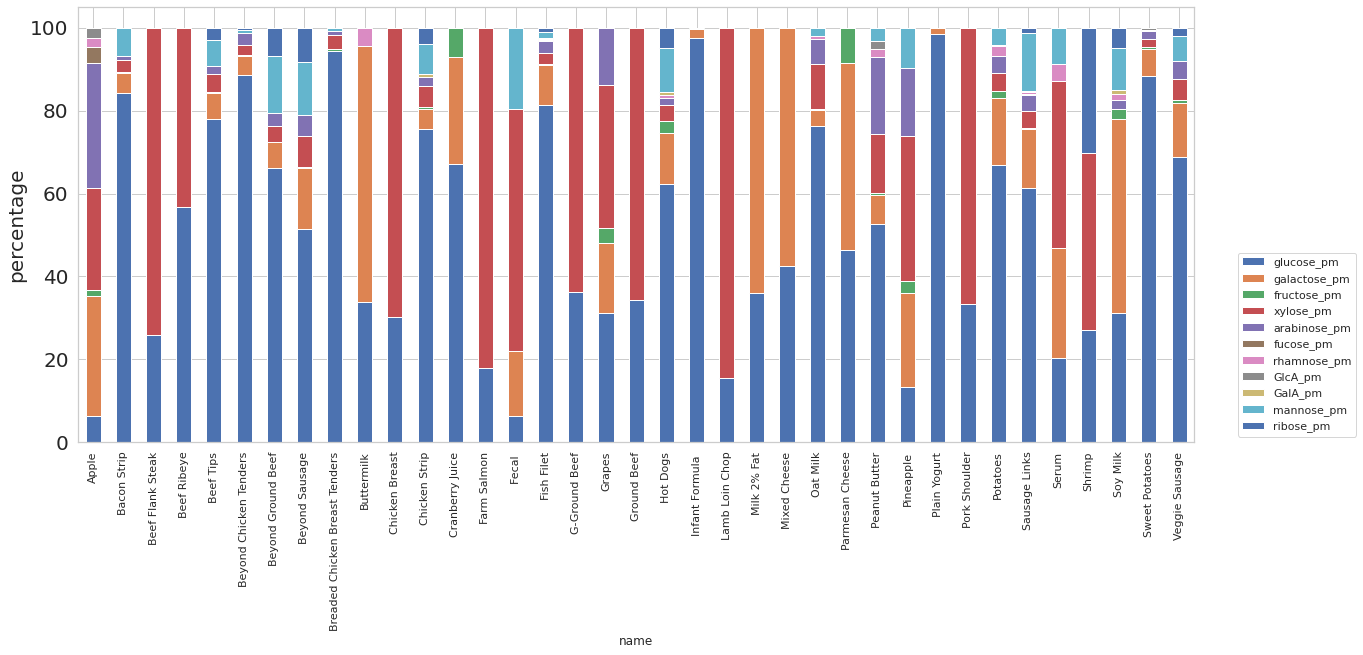

In [279]:
sum = df2.sum(axis=1)
df3 = pd.DataFrame()
for a in df2.columns:
    df3[a]=(df2[a]/sum)*100
df3.plot(kind="bar",figsize=(20,8),stacked=True)
plt.legend(loc=4,prop={"size":11},ncol=1, bbox_to_anchor=(1.15, 0),
          fancybox=True)
plt.yticks(fontsize=20)
plt.ylabel("percentage",fontsize=20)
plt.show()

For graph below do you happen to know how to adjust its y-axis individually? 

On y axis the names of the foods are displayed. The number limits like 0 to 30 that you asked to set in message are set on x axis.

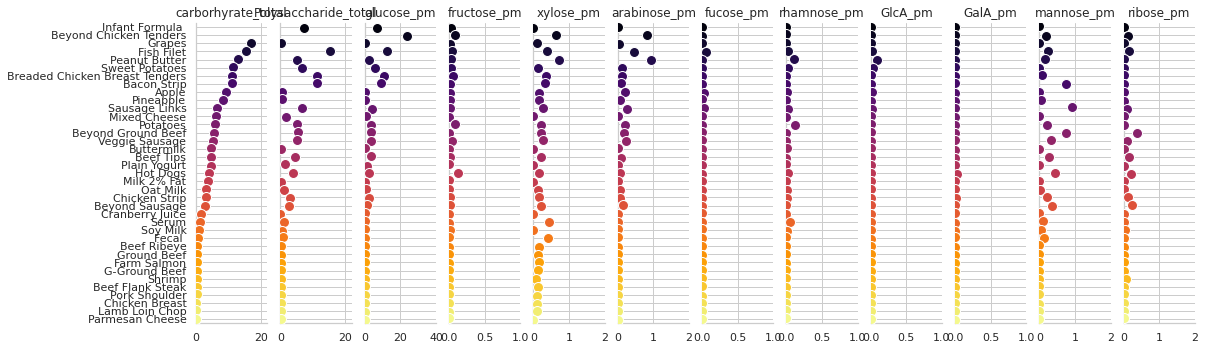

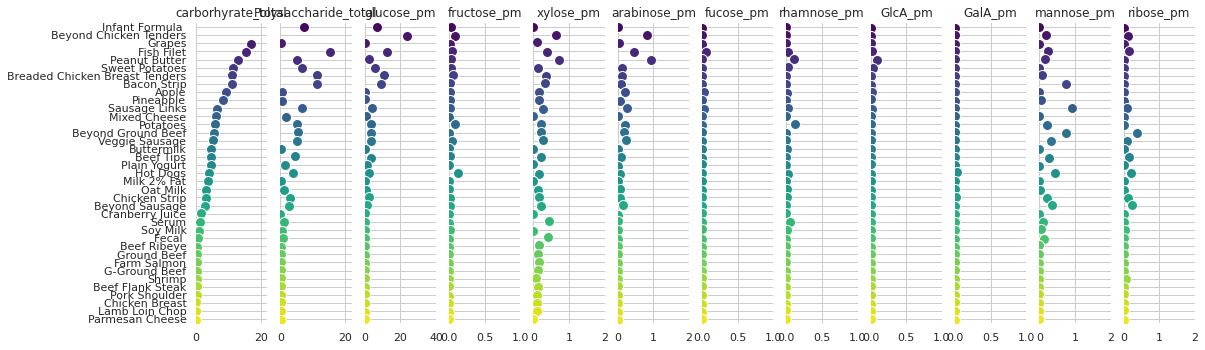

In [280]:
sns.set_theme(style="whitegrid")

# Load the dataset

df.index=df.name
carbs = df[["carborhyrate_total","fibers_total","glucose_pm","fructose_pm", "xylose_pm", "arabinose_pm", "fucose_pm", "rhamnose_pm",
       "GlcA_pm", "GalA_pm", "mannose_pm", "ribose_pm", "name"]].sort_values("carborhyrate_total", ascending=False)

# Make the PairGrid
g = sns.PairGrid(carbs.sort_values("carborhyrate_total", ascending=False),
                 x_vars=carbs.columns[:-1], y_vars=["name"],
                 height=5, aspect=.25)

p = sns.PairGrid(carbs.sort_values("carborhyrate_total", ascending=False),
                 x_vars=carbs.columns[:-1], y_vars=["name"],
                 height=5, aspect=.25)



# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=True,
      palette="inferno", linewidth=1, edgecolor="w")


p.map(sns.stripplot, size=10, orient="h", jitter=True,
      palette="viridis", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-1, 30), xlabel="", ylabel="")
p.set(xlim=(0, 2), xlabel="", ylabel="")


# Use semantically meaningful titles for the columns
titles = ["carborhyrate_total","Polysaccharide_total","glucose_pm","fructose_pm", "xylose_pm", "arabinose_pm", "fucose_pm", "rhamnose_pm",
       "GlcA_pm", "GalA_pm", "mannose_pm", "ribose_pm"]
############################################################################################# set individual x limits here
limits = [(0,22),(0,22),(0,40),(0,1),(0,2),(0,2),(0,1),(0,1),(0,1),(0,1),(0,2),(0,2)]

for ax, title, lim in zip(g.axes.flat, titles,limits):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set(xlim=lim)
    # Make the grid horizontal instead of vertical
    #ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
for ax, title,lim in zip(p.axes.flat, titles,limits):
 # Set a different title for each axes
    ax.set(title=title)
    ax.set(xlim=lim)
    # Make the grid horizontal instead of vertical
    #ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# **Overall Macronutrient Analysis**

Task1: group food based on catergoies 
Grouping the data into categories can give us the total count of all metrics and thus we can analyse the categories.
Food group = Fruit & Vegetables, Cereals & Grains, Dariy Products,  Nuts & Seeds, Meat, Seafood, Fish, 

In [259]:
df.index

Index(['Apple', 'Bacon Strip', 'Beef Flank Steak', 'Beef Ribeye', 'Beef Tips',
       'Beyond Chicken Tenders', 'Beyond Ground Beef', 'Beyond Sausage',
       'Breaded Chicken Breast Tenders', 'Buttermilk', 'Chicken Breast',
       'Chicken Strip', 'Cranberry Juice', 'Farm Salmon', 'Fecal ',
       'Fish Filet', 'G-Ground Beef', 'Grapes', 'Ground Beef', 'Hot Dogs',
       'Infant Formula ', 'Lamb Loin Chop', 'Milk 2% Fat', 'Mixed Cheese',
       'Oat Milk', 'Parmesan Cheese', 'Peanut Butter', 'Pineapple',
       'Plain Yogurt', 'Pork Shoulder', 'Potatoes', 'Sausage Links', 'Serum',
       'Shrimp', 'Soy Milk', 'Sweet Potatoes', 'Veggie Sausage'],
      dtype='object', name='name')

In [281]:
df["food_group"]=["Dairy","Dairy","Dairy","Dairy","Fruit",
                  "Fruit","Fruit","Vegetables","Vegetables","Beverages",
                 "Dairy","Beverages","Beverages","Protein",
                 "Dairy","Serum","Fecal","Plant-Based","Plant-Based",
                 "Plant-Based","Plant-Based","Plant-Based","Plant-Based",
                 "Plant-Based","Plant-Based","Plant-Based","Plant-Based",
                 "Meat","Meat","Meat","Seafood",
                  "Meat","Meat","Meat","Seafood"]

ValueError: Length of values (35) does not match length of index (37)

In [ ]:
df.groupby("food_group")["calories"].agg(["mean","max"]).plot(kind="bar",figsize=(20,5))
plt.xticks(fontsize=20)
plt.show()

In [ ]:
#Can we make this into 2 rows? i
#Yeah, Done
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


def makeAxis(title, tickangle):
    return {
      'title': title,
      'titlefont': { 'size': 15 },
      'tickangle': tickangle,
      'tickfont': { 'size': 15 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 2,
      'showline': True,
      'showgrid': True
    }
fig = make_subplots(rows=2, cols=4,specs=[[{"type": "ternary"},{"type": "ternary"},{"type": "ternary"},{"type": "ternary"}], [{"type": "ternary"},{"type": "ternary"},{"type": "ternary"},{}]],subplot_titles=["Dairy","Protein","Fruits","Vegetables","Meat", "Seafood", "Beverages"],vertical_spacing=0.4)
a="fibers_total"
b="fat_total"
c="carborhyrate_total"
df1 = df[df.food_group=="Dairy"]
df2 = df[df.food_group=="Protein"]
df3 = df[df.food_group=="Fruits"]
df4 = df[df.food_group=="Vegetables"]
df5 = df[df.food_group=="Meat"]
df6 = df[df.food_group=="Seafood"]
df7 = df[df.food_group=="Beverages"]


fig.add_trace(go.Scatterternary({"mode":"markers","a":df1[a],"b":df1[b],"c":df1[c],"marker":{"color":"green","size":20}}),row=1,col=1)
fig.add_trace(go.Scatterternary({"mode":"markers","a":df2[a],"b":df2[b],"c":df2[c],"marker":{"color":"red","size":20}}),row=1,col=2)
fig.add_trace(go.Scatterternary({"mode":"markers","a":df3[a],"b":df3[b],"c":df3[c],"marker":{"color":"pink","size":20}}),row=1,col=3)
fig.add_trace(go.Scatterternary({"mode":"markers","a":df4[a],"b":df4[b],"c":df4[c],"marker":{"color":"blue","size":20}}),row=1,col=4)
fig.add_trace(go.Scatterternary({"mode":"markers","a":df5[a],"b":df4[b],"c":df4[c],"marker":{"color":"blue","size":20}}),row=2,col=1)
fig.add_trace(go.Scatterternary({"mode":"markers","a":df6[a],"b":df4[b],"c":df4[c],"marker":{"color":"blue","size":20}}),row=2,col=2)
fig.add_trace(go.Scatterternary({"mode":"markers","a":df7[a],"b":df4[b],"c":df4[c],"marker":{"color":"blue","size":20}}),row=2,col=3)
fig.update_ternaries(patch={'aaxis': makeAxis("Fibers", 0),'baxis': makeAxis("Fats", 0),'caxis': makeAxis("Carbs", 0)})
fig.update_layout(showlegend=False)
fig.layout.annotations[0].update(y=1.15)
fig.layout.annotations[1].update(y=1.15)
fig.layout.annotations[2].update(y=1.15)
fig.layout.annotations[3].update(y=1.15)
fig.layout.annotations[4].update(y=0.45)
fig.layout.annotations[5].update(y=0.45)
fig.layout.annotations[6].update(y=0.45)
fig.show()

In [ ]:
#name of the food and fibers overlap, food name should be on top with some space.
#Done
li=[{"type": "ternary"},{"type": "ternary"},{"type": "ternary"},{"type": "ternary"}]
fig = make_subplots(rows=8, cols=4,specs=[li,li,li,li,li,li,li,li],horizontal_spacing=0, subplot_titles=df.index)
a="fibers_total"
b="fat_total"
c="free_saccharides_total"
row=1
col=1
for x in df.index[:32]:
    df1=pd.DataFrame(df.loc[x]).T
    fig.add_trace(go.Scatterternary({"mode":"markers","a":df1[a],"b":df1[b],"c":df1[c],"marker":{"color":"green","size":30}}),row=row,col=col)
    if col%4==0:
        row=row+1
        col=0
    col=col+1
fig.update_ternaries(patch={'aaxis': makeAxis("Fibers", 0),'baxis': makeAxis("Fats", 0),'caxis': makeAxis("Carbs", 0)})
fig.update_layout(showlegend=False,autosize=False,width=1800,height=3000)
for a in range(0,32):
    fig.layout.annotations[a].update(y=fig.layout.annotations[a]["y"]+0.01)
fig.show()

In [ ]:
df.head()
df.index

In [ ]:
#Can I drop some food here from column name?
#Yeah, here you can add the name of the items with buttermilk
df1 = df.drop(["Buttermilk"])

plt.figure(figsize=(15,8))
sns.relplot(data=df1, x="monounsaturated_fatty_acids", y="polyunsaturated_fatty_acids", hue="name", size="saturated_fatty_acids",sizes=(100,500),palette="muted",height=6, aspect=3)
plt.show()

In [ ]:
px.scatter(df, x='monounsaturated_fatty_acids', y='free_saccharides_total',size='fibers_total', color='name',hover_name='name', log_x=True, size_max=60)

In [ ]:
# Task 4: I l.allke this seaborn, I found a code template online if you could modify them into our data.

df8 = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df8.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df8 = df8.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df8.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df8.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df8.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

In [ ]:
sns.clustermap(df.corr(),cmap="mako",
               figsize=(20, 20),
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0, .2, .03, .4))

In [ ]:
sns.clustermap(df.iloc[:,:40].corr(),cmap="vlag",
               figsize=(20, 20),
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0, .2, .03, .4))

In [ ]:
sns.clustermap(df.iloc[:,40:60].corr(),cmap="cividis",
               figsize=(20, 20),
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0, .2, .03, .4))

In [ ]:
#can we make this into multiple row as well?
#This one cant be simply divided into a grid like 3*4 or 8*2, It make grid based on a column, so I shifted it from 1*8 to 8*1
t = sns.FacetGrid(df,row="food_group",height=4,aspect=1.2)
t.map_dataframe(sns.scatterplot,x="calories",y="fat_total")
plt.show()